# Assignment

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [65]:
#Mengecek jumlah null di setiap kolom
dfnull = df.isnull()
for column in dfnull.columns:
    print(dfnull[column].value_counts())

False    1460
Name: Id, dtype: int64
False    1460
Name: MSSubClass, dtype: int64
False    1460
Name: MSZoning, dtype: int64
False    1201
True      259
Name: LotFrontage, dtype: int64
False    1460
Name: LotArea, dtype: int64
False    1460
Name: Street, dtype: int64
True     1369
False      91
Name: Alley, dtype: int64
False    1460
Name: LotShape, dtype: int64
False    1460
Name: LandContour, dtype: int64
False    1460
Name: Utilities, dtype: int64
False    1460
Name: LotConfig, dtype: int64
False    1460
Name: LandSlope, dtype: int64
False    1460
Name: Neighborhood, dtype: int64
False    1460
Name: Condition1, dtype: int64
False    1460
Name: Condition2, dtype: int64
False    1460
Name: BldgType, dtype: int64
False    1460
Name: HouseStyle, dtype: int64
False    1460
Name: OverallQual, dtype: int64
False    1460
Name: OverallCond, dtype: int64
False    1460
Name: YearBuilt, dtype: int64
False    1460
Name: YearRemodAdd, dtype: int64
False    1460
Name: RoofStyle, dtype: int64
False

In [67]:
df.select_dtypes('object')
df.groupby(['Neighborhood'], as_index=False).size()

for i in df.select_dtypes('object').columns:
    print(pd.DataFrame(df.groupby([i], as_index=False).size()))

  MSZoning  size
0  C (all)    10
1       FV    65
2       RH    16
3       RL  1151
4       RM   218
  Street  size
0   Grvl     6
1   Pave  1454
  Alley  size
0  Grvl    50
1  Pave    41
  LotShape  size
0      IR1   484
1      IR2    41
2      IR3    10
3      Reg   925
  LandContour  size
0         Bnk    63
1         HLS    50
2         Low    36
3         Lvl  1311
  Utilities  size
0    AllPub  1459
1    NoSeWa     1
  LotConfig  size
0    Corner   263
1   CulDSac    94
2       FR2    47
3       FR3     4
4    Inside  1052
  LandSlope  size
0       Gtl  1382
1       Mod    65
2       Sev    13
   Neighborhood  size
0       Blmngtn    17
1       Blueste     2
2        BrDale    16
3       BrkSide    58
4       ClearCr    28
5       CollgCr   150
6       Crawfor    51
7       Edwards   100
8       Gilbert    79
9        IDOTRR    37
10      MeadowV    17
11      Mitchel    49
12        NAmes   225
13      NPkVill     9
14       NWAmes    73
15      NoRidge    41
16      NridgHt   

# 1. Count of one categorical feature

### Bar Plot Type of Alley

(0.0, 75.0)

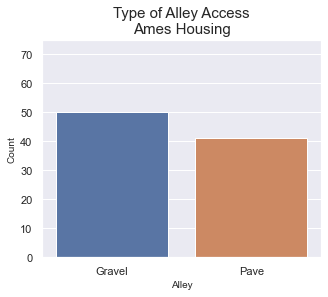

In [81]:
#Menampilkan bar plot untuk kolom Alley
dfalley = df.groupby(['Alley'], as_index=False).size()
dfalley['Alley'] = dfalley['Alley'].str.replace('Grvl', 'Gravel')

plt.figure(figsize=(5, 4))
sns.barplot(x=dfalley['Alley'], y=dfalley['size'])
plt.title('Type of Alley Access\nAmes Housing', fontsize=15)
plt.xlabel('Alley', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.ylim(0, 75)

### Bar Plot Type of Garage

Text(0, 0.5, 'Count')

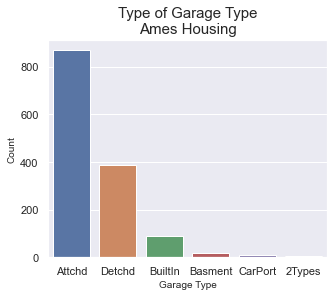

In [177]:
dfgarage = df.groupby(['GarageType'], as_index=False).size().sort_values('size', ascending=False)

plt.figure(figsize=(5, 4))
sns.barplot(x=dfgarage['GarageType'], y=dfgarage['size'])
plt.title('Type of Garage Type\nAmes Housing', fontsize=15)
plt.xlabel('Garage Type', fontsize=10)
plt.ylabel('Count', fontsize=10)


### Bar Plot House Style

[Text(5, 0, '726'),
 Text(5, 0, '445'),
 Text(5, 0, '154'),
 Text(5, 0, '65'),
 Text(5, 0, '37'),
 Text(5, 0, '14'),
 Text(5, 0, '11'),
 Text(5, 0, '8')]

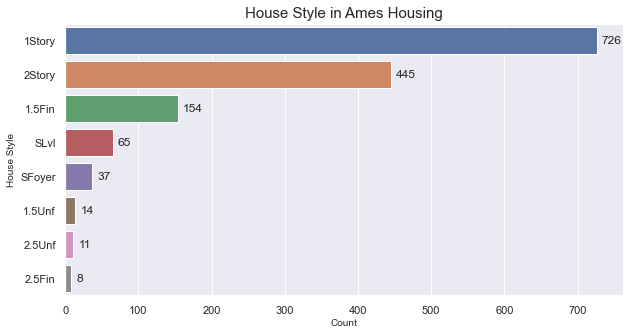

In [187]:
dfstyle = df.groupby(['HouseStyle'], as_index=False).size().sort_values('size', ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=dfstyle['size'], y=dfstyle['HouseStyle'])
plt.title('House Style in Ames Housing', fontsize=15)
plt.ylabel('House Style', fontsize=10)
plt.xlabel('Count', fontsize=10)

ax.bar_label(ax.containers[0], padding=5)
#for i in range(len(dfstyle['size'])):
#    plt.text(x=dfstyle['size'][i]+0.5, y=dfstyle['HouseStyle'][i], s=str(dfstyle['size'][i]), ha='center')

# 2. Distribution of one continuous feature

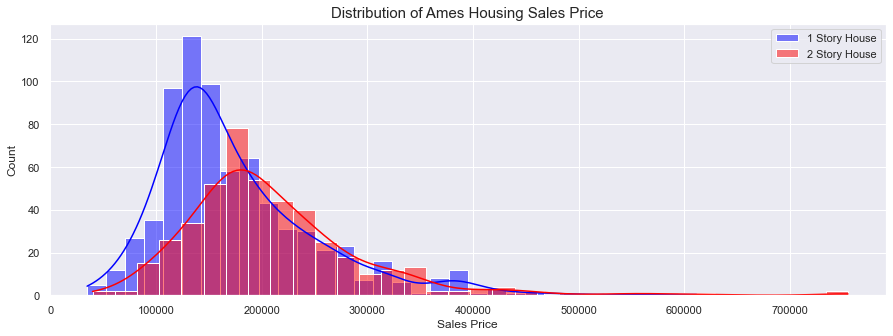

In [191]:
single = df[df['HouseStyle']=='1Story']
double = df[df['HouseStyle']=='2Story']

sns.histplot(x = single['SalePrice'], label='1 Story House', stat='count', color='blue', kde=True)
sns.histplot(x = double['SalePrice'], label='2 Story House', stat='count', color='red', kde=True)
plt.legend()
plt.title('Distribution of Ames Housing Sales Price', fontsize=15)
plt.xlabel('Sales Price')

plt.gcf().set_size_inches(15, 5)

# 3. Categorical-continuous

### Relation between House Sales Price and Its House Style

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


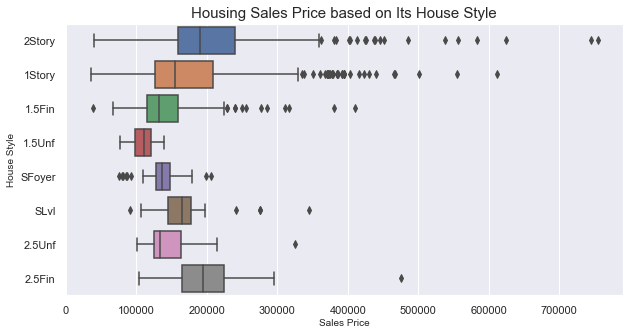

In [167]:
sns.boxplot(df['SalePrice'], df['HouseStyle'])
#ax = sns.swarmplot(df['SalePrice'], df['HouseStyle'], color=".25")
plt.title('Housing Sales Price based on Its House Style', fontsize=15)
plt.xlabel('Sales Price', fontsize=10)
plt.ylabel('House Style', fontsize=10)
plt.gcf().set_size_inches(10, 5)

# 4. Continuous-continuous

### Relation between House Sales Price and Its Ground Living Area

Text(0, 0.5, 'Sales Price')

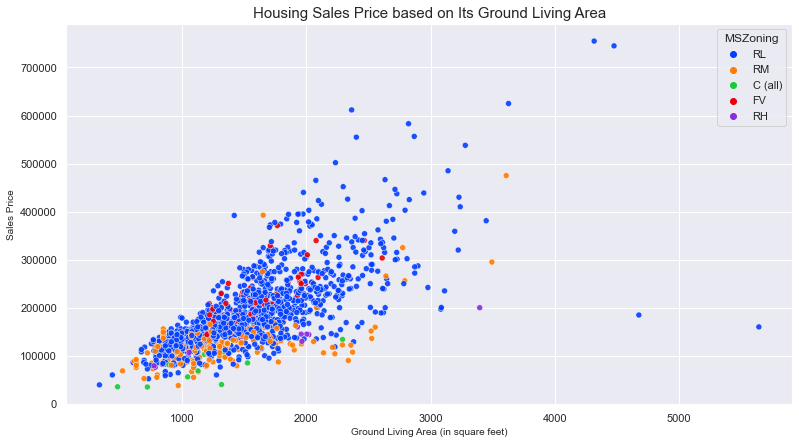

In [158]:
color = sns.color_palette("bright", 5)
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], hue=df['MSZoning'], palette=color, alpha=0.9)
#sns.regplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.gcf().set_size_inches(13, 7)
plt.title('Housing Sales Price based on Its Ground Living Area', fontsize=15)
plt.xlabel('Ground Living Area (in square feet)', fontsize=10)
plt.ylabel('Sales Price', fontsize=10)